ANALISIS EXPLORATORIO.

Insurance

In [68]:
import numpy as np
import pandas as pd
import matplotlib as plt
import ipywidgets as widgets
from pylab import *

In [3]:
datos = pd.read_csv("C:/Users/Equipo/Desktop/CUNEF/Machine Learning/Bases de Datos/insurance.csv")

In [4]:
datos

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950


El dataset que he elegido corresponde a ciertos datos que contienen información de las personas pertenecientes a cuatro regiones y en función de esta información, cuánto les cobran las compañías de seguros para asegurarlos. El objetivo es predecir los cargos del seguro para las nuevas personas en función de la información que obtendremos de ellos. 

Las variables son las siguientes: Edad, Sexo, IMC, Nº de hijos, Fumadores (si/no), Región, Cargos monetarios. 

    *Edad: es la edad de cada individuo.
    
    *Sexo: es una variable categórica que nos indica con el valor 0 que dicho individuo es un hombre y con el valor 1 nos está indicando que dicha observación se trata de una mujer.
    
    *IMC: es el indice de masa corporal, se calcula dividiendo la altura en centimetros entre la altura en metros elevada al cuadrado. IMC = centimetros/metros^2
    
    *Nº de Hijos: indica el número de hijos que tiene cada observación.
    
    *Fumadores: es una variable categórica que nos indica con el valor 0 que dicho individuo no es fumador y con el valor 1 nos está indicando que el individuo observado si es fumador.
    
    *Región: nos indica en la región que viven los individuos de la muestra va de 0 a 3 por tanto existen 4 regiones observadas.
    
    *Cargos monetarios: es la cuantía en €uros que deben de pagar los individuos en caso de ser asegurados.

La muestra está compuesta por 348 individuos los cuales son los registros distribuidos en torno a su información para cada variable.


In [5]:
datos.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


Si nos fijamos en los estadísticos descriptivos de la tabla anterior podemos sacar varias conclusiones:
      
      * En cuanto al valor de la media aritmética observamos que el individuo medio es una mujer de 39 años de edad IMC de 30.67 con un hijo a su cargo, para la que los cargos en su seguro ascenderían a 14.016,42 €uros.
      
      * La edad mínima de los individuos del estudios es de 18 años y la edad máxima de 64 años.
      
      *En cuanto a los cuartiles tenemos lo siguiente la mediana, que es la medida que divide a la muestra en dos se sitúa en 40 años si nos referimos a la edad por tanto está muy próxima a la media. En cuanto al IMC la mediana es de 30.30 y respecto a los cargos monetarios dicha medida se situa en 9719.30 €uros, lo que quiere decir que la mitad de la muestra pagaría por debajo de esa cantidad y la otra mitad por encima de dicha cantidad, este valor si difiere bastante de su media (14.016,42 €uros) por lo que existe una diferencia de 4.279,12 €uros.
      
      *Respecto al número de hijos la mitad de la muestra tiene o un hijo o ninguno y la otra mitad 1 o más.
      

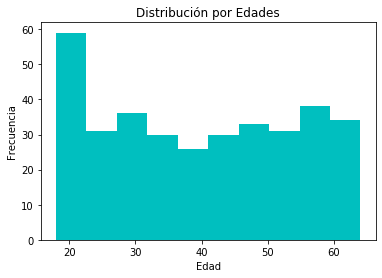

In [125]:
plt.hist(datos.age, color = "c")   
plt.title("Distribución por Edades")   
plt.xlabel("Edad")   
plt.ylabel("Frecuencia");   

En cuanto a la edad podemos observar que existe un pico en el intervalo de edad comprendido entre (18 - 22) años, siendo el intervalo de edad menos frecuente el que esta comprendido entre los (38 - 41) años. 

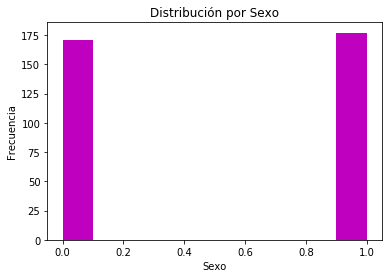

In [126]:
plt.hist(datos.sex, color = "m")   
plt.title("Distribución por Sexo")   
plt.xlabel("Sexo")   
plt.ylabel("Frecuencia");

Viendo el gráfico anterior podemos observar que la mayor parte de los registros pertenecen a mujeres.

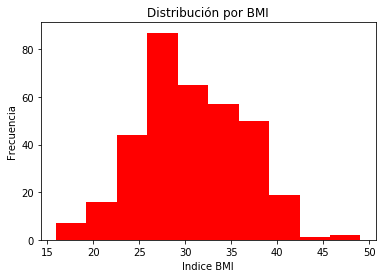

In [121]:
plt.hist(datos.bmi, color = "r")   
plt.title("Distribución por BMI")   
plt.xlabel("Indice BMI")   
plt.ylabel("Frecuencia");

A la vista de lo anterior y considerando la siguiente tabla como referencia para clasificar el BMI podemos dar los analizar los resultados del histograma.
  
  BMI	       Classification
< 18.5	    por debajo de lo normal
18.5–24.9	peso normal
25.0–29.9	sobrepeso
30.0–34.9	obesidad de clase I
35.0–39.9	obesidad de clase II
≥ 40.0	    obesidad de clase III

La mayor parte de las observaciones de la muestra se situan en torno al (26 - 28) lo que quiere decir que la mayor parte de la población de estas 4 regiones sufre un ligero sobrepeso, pero también cabe señalar que la mayoría de las observaciones si las analizamos en conjunto estarían en unos niveles de obesidad bastante preocupantes.

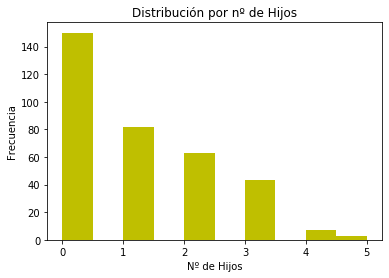

In [105]:
plt.hist(datos.children, color = "y")   
plt.title("Distribución por nº de Hijos")   
plt.xlabel("Nº de Hijos")   
plt.ylabel("Frecuencia");

La distribución del histograma anterior nos muestra cual es el numero de hijos que tienen los individuos observados en las 4 regiones del estudio. Esta variable esta muy relacionada con la variable edad, como podemos observar la mayor parte no tiene hijos ya que el rango de edad predominante está comprendido entre los 18 y los 22 años. Hay individuos con 1 o 2 hijos, los cuales comprenden el mayor porcentaje de familias con hijos pero en el campo de familias numeros la cosa cambia, considerando familia numerosa a tener 3 hijos o más, en este caso existen unas 50 familias con 3 hijos pero a partir de ahi familias con 4 o 5 hijos (siendo 5 el máximo de la muestra) son mucho menos frecuentes.

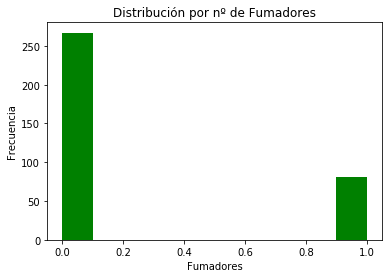

In [102]:
plt.hist(datos.smoker, color = "g")   
plt.title("Distribución por nº de Fumadores")   
plt.xlabel("Fumadores")   
plt.ylabel("Frecuencia");

En cuanto a la distribución por número de fumadores vemos que la mayor parte de los individuos muestrales no son fumadores.

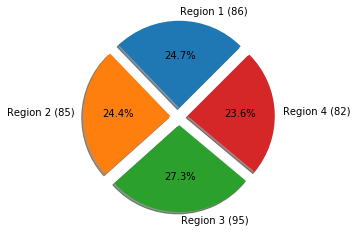

In [119]:
labels = 'Region 1 (86)', 'Region 2 (85)', 'Region 3 (95)', 'Region 4 (82)'
sizes = [24.71, 24.42, 27.29, 23.58]
explode = (0.1, 0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45);

En cuanto a la variable región los individuos estan distribuidos como el piechart que aparece justo encima, dentro de las porciones va el porcentaje de habitantes por cada región y al lado entre parentesis de los nombres de las regiones el numero de habitantes por región, siendo la región 3 la que mayor número de habitantes posee.

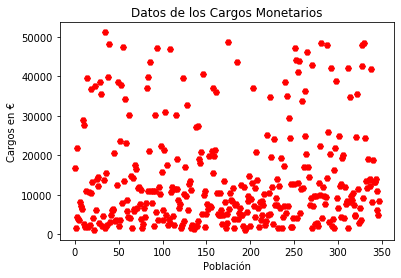

In [88]:
plt.plot(datos.charges, marker='H', linestyle='', color='r') 
plt.title("Datos de los Cargos Monetarios")
plt.xlabel("Población")   
plt.ylabel("Cargos en €");

En el gráfico anterior vemos el cargo monetario que le corresponde a cada individuo, analizando mas profundamente hemos podido observar que el máximo está en 51.194,56 €uros y corresponde a un individuo mujer con 28 años de edad, con un hijo a su cargo y que además tiene un indice de masa corporal (BMI) de 36.4, que es fumadora y pertenece a la region 3. En cuanto al valor mínimo del cargo monetario que tiene un montante de 1.137,01 €uros, pertenece a una mujer de 18 años perteneciente a la región 2 y que tiene un indice de masa corporal de 34.1, no tiene hijos y tampoco fuma. 

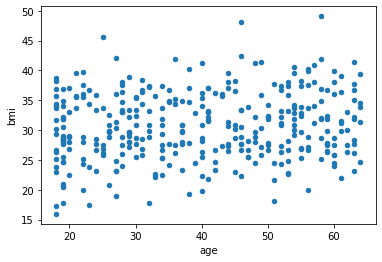

In [38]:
 my_plot = datos.plot("age", "bmi", kind = "scatter");

En este grádico vemos la dispersión de los datos con respecto a la edad y el IMC.

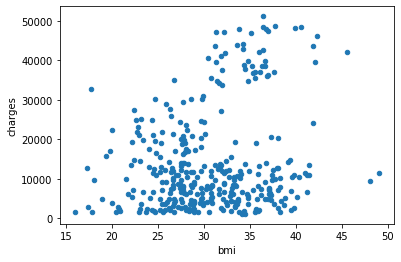

In [66]:
my_plot = datos.plot("bmi", "charges", kind = "scatter");

En este grádico vemos la dispersión de los datos con respecto al IMC y los cargos monerarios.

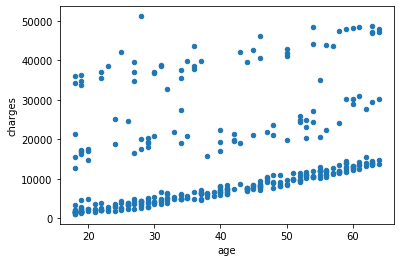

In [128]:
my_plot = datos.plot("age", "charges", kind = "scatter");

En este grádico vemos la dispersión de los datos en respecto a la edad y los cargos monetarios.